## Python Datetime Review
[https://docs.python.org/3/library/datetime.html](https://docs.python.org/3/library/datetime.html)

In [ ]:
from datetime import datetime

In [ ]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [ ]:
# January 2nd, 2017
my_date = datetime(my_year, my_month, my_day)

In [ ]:
# Defaults to 0:00
my_date 

In [ ]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [ ]:
my_date_time

In [ ]:
my_date.day

In [ ]:
my_date_time.hour

## NumPy Datetime Arrays
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.

https://docs.scipy.org/doc/numpy-1.15.4/reference/arrays.datetime.html

In [ ]:
import numpy as np

In [ ]:
# CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')

<div class="alert alert-info"><strong>NOTE:</strong> 
    If we want we can pass in a different precision level, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [ ]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[h]')

In [ ]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

## NumPy Date Ranges
We can use <tt>np.arange(start,stop,step)</tt> to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [ ]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

By omitting the step value we can obtain every value based on the precision.

In [ ]:
# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975
np.arange('1968', '1976', dtype='datetime64[Y]')

## Pandas Datetime Index

https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [ ]:
import pandas as pd

The simplest way to build a DatetimeIndex is with the <tt><strong>pd.date_range()</strong></tt> method:

In [ ]:
# THE WEEK OF JULY 8TH, 2018
# idx = pd.date_range('7/8/2018', periods=7, freq='D')
idx = pd.date_range('2018/7/8', periods=7, freq='D')
idx

<div class="alert alert-info"><strong>DatetimeIndex Frequencies:</strong> When we used <tt>pd.date_range()</tt> above, we had to pass in a frequency parameter <tt>'D'</tt>. A list of time series offset aliases like <tt>'D'</tt> can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.</div>

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [ ]:
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

A third way is to pass a list or an array of datetime objects into the <tt><strong>pd.DatetimeIndex()</strong></tt> method:

In [ ]:
# Create a NumPy datetime array
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

In [ ]:
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

Notice that even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision!

In [ ]:
# Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

In [ ]:
# Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data=data, index=idx, columns=cols)
df

In [ ]:
df.index

In [ ]:
# Latest Date Value
df.index.max()

In [ ]:
# Latest Date Index Location
df.index.argmax()

In [ ]:
# Earliest Date Value
df.index.min()

In [ ]:
# Earliest Date Index Location
df.index.argmin()

## Time Shifting

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/TimeSeries/Data/starbucks.csv', index_col='Date', parse_dates=True)

In [ ]:
df.head()

In [ ]:
df.tail()

**shift() forward**

This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [ ]:
df.shift(1).head()

In [ ]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

**.shift() backwards**

In [ ]:
df.shift(-1).head()

In [ ]:
df.shift(-1).tail()

**Shifting based on Time Series Frequency Code**

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table from the Time Resampling lecture for a full list of values, or click <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.<br>

In [33]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


## Rolling

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [ ]:
import pandas as pd

In [34]:
# Import the data:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/TimeSeries/Data/starbucks.csv', index_col='Date', parse_dates=True)

In [35]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


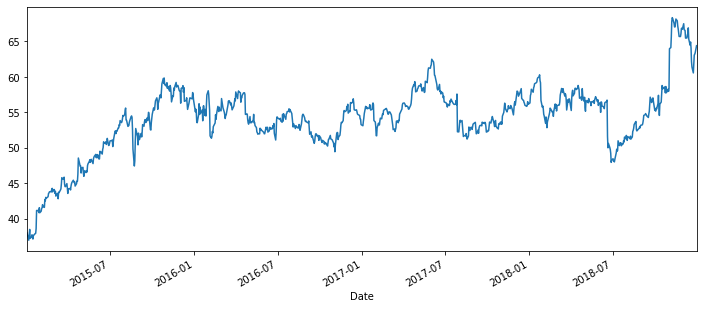

In [36]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x', tight=True);

Now let's add in a rolling mean

In [37]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


In [42]:
# add rolling mean column (30 days)
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

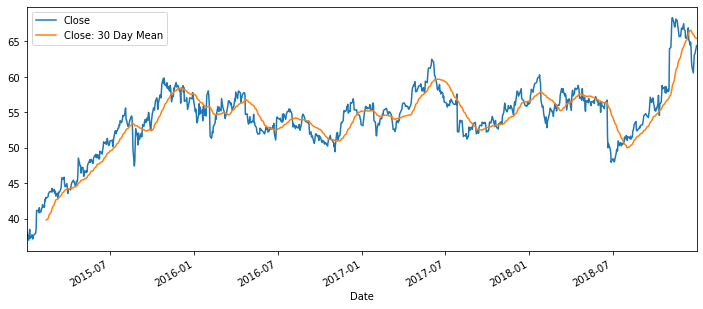

In [43]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x', tight=True);

## Expanding

Takes into account everything from the start of the time series up to each point in time.

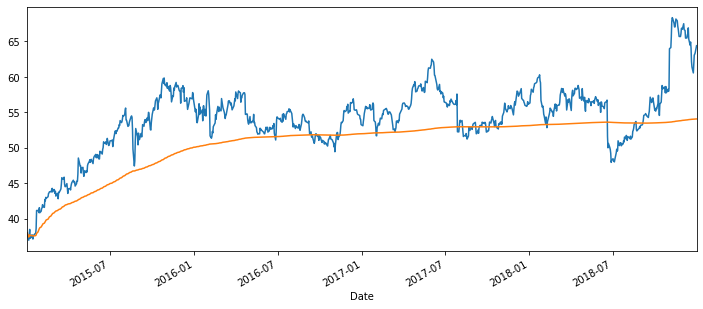

In [49]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=0).mean().plot(figsize=(12,5));

# Time Resampling


In [55]:
import pandas as pd

In [56]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/TimeSeries/Data/starbucks.csv', index_col='Date', parse_dates=True)

In [57]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## resample()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [58]:
# Our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [59]:
# Yearly Means
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [60]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [61]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


### Plotting

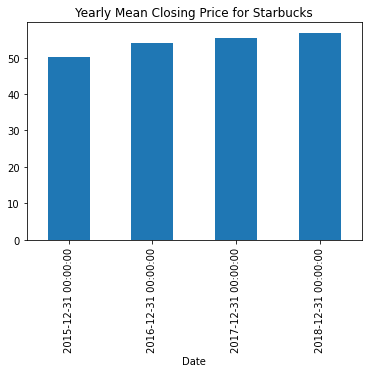

In [66]:
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title);

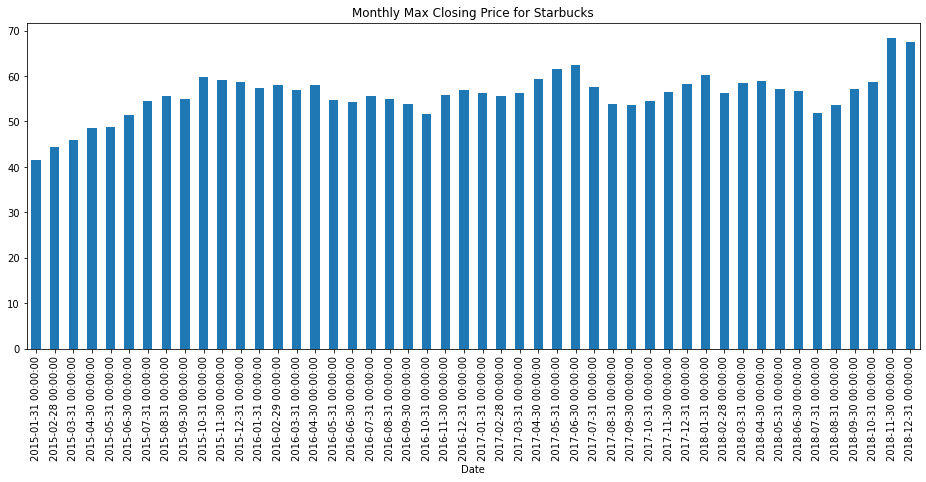

In [67]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title);